In [12]:
# Load our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import string

# Load data
dataSet = pd.read_csv("datasets/final.csv", index_col = [0], low_memory = False)

In [13]:
# How many Datas
print(f"Total Datas: {dataSet.shape}")
Input = int(input("How many Datas you want to analyze: "))

Total Datas: (3169996, 14)
How many Datas you want to analyze: 10000


In [14]:
# Create "StoreName" columns based on StoreCode
def Store_name(value):
    if value == "19 Below":
        return "1"
    elif value == "20~29":
        return "2"
    elif value == "30~39":
        return "3"
    elif value == "40~49":
        return "4"
    else:
        return "5"

In [15]:
# Choose Age
dataSet["AgeCode"] = dataSet["Age"].head(Input).apply(Store_name)

In [16]:
#assign variable
age = ["19 Below", "20~29", "30~39", "40~49", "50 Above"] # label
spend = [0, 0, 0, 0, 0]
count = [0, 0, 0, 0, 0]
average = [0, 0, 0, 0, 0]

data1 = dataSet[(dataSet["AgeCode"] == "1")]
data2 = dataSet[(dataSet["AgeCode"] == "2")]
data3 = dataSet[(dataSet["AgeCode"] == "3")]
data4 = dataSet[(dataSet["AgeCode"] == "4")]
data5 = dataSet[(dataSet["AgeCode"] == "5")]

In [17]:
for i in dataSet["AgeCode"]:
    if i == "1":
        count[0] += 1
        for i in data1["MealSpending"]:
            spend[0] += int(i)
    elif i == "2":
        count[1] += 1
        for i in data2["MealSpending"]:
            spend[1] += int(i)
    elif i == "3":
        count[2] += 1
        for i in data3["MealSpending"]:
            spend[2] += int(i)
    elif i == "4":
        count[3] += 1
        for i in data4["MealSpending"]:
            spend[3] += int(i)
    elif i == "5":
        count[4] += 1
        for i in data5["MealSpending"]:
            spend[4] += int(i)

In [18]:
#count average
spend[0] /= len(data1["MealSpending"])
spend[1] /= len(data2["MealSpending"])
spend[2] /= len(data3["MealSpending"])
spend[3] /= len(data4["MealSpending"])
spend[4] /= len(data5["MealSpending"])

In [19]:
# 花費時間取小數點第二位
for i in range(len(spend)):
    spend[i] = round(spend[i], 2)

In [20]:
# 平均值取小數第二位
for i in range(len(average)):
    average[i] = spend[i] / count[i]
    average[i] = round(average[i], 2)
print(f"count: {count}")
print(f"spend: {spend}")
print(f"average: {average}")
color = ['r', 'b', 'g', 'y', 'm']

count: [269, 2104, 5373, 1692, 562]
spend: [49992.0, 534637.0, 1434030.0, 452382.0, 123190.0]
average: [185.84, 254.11, 266.9, 267.37, 219.2]


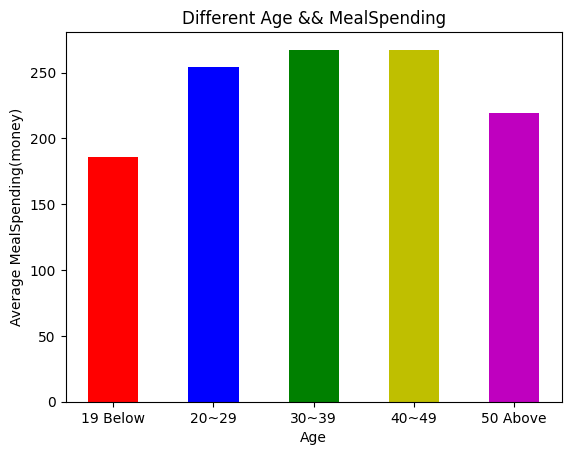

In [21]:
for i in range(0, 5):
    plt.bar(age[i], average[i], color = color[i], width = 0.5)
plt.title("Different Age && MealSpending")  # title
plt.xlabel("Age")   # x label
plt.ylabel("Average MealSpending(money)") # y label
plt.show()